# Cricket Trend Sentiment Analysis by Using Twitter API

In [393]:
import requests
from twython import Twython
from credentials import *
import datetime
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

### Consumer key and Consumer secret key
- Keys are using from credentials file.

In [121]:
twitter= Twython(CONSUMER_KEY, CONSUMER_SECRET)

# Create Dataframe by using JSON Normalize

In [296]:
tweets=pd.json_normalize(twitter.search(q="#cricket",result_type="recent", until='2021-11-15', count=2000)["statuses"])

In [297]:
tweets.head(3)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang
0,Sun Nov 14 23:59:52 +0000 2021,1460034780561645569,1460034780561645569,RT @SajSadiqCricket: T20 World Cup winners:\n\...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 14 23:59:22 +0000 2021,1460034653193060355,1460034653193060355,RT @QasimKhanSuri: Congratulations to #Austral...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 14 23:59:08 +0000 2021,1460034595890417666,1460034595890417666,RT @amitspeakshere: Heart goes out for @BLACKC...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataframe Preprocessing

## 245 columns retrieved in dataframe

In [195]:
tweets.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'quoted_status.coordinates', 'quoted_status.place',
       'quoted_status.contributors', 'quoted_status.is_quote_status',
       'quoted_status.retweet_count', 'quoted_status.favorite_count',
       'quoted_status.favorited', 'quoted_status.retweeted',
       'quoted_status.possibly_sensitive', 'quoted_status.lang'],
      dtype='object', length=245)

## Read all column names by using Numpy array

In [196]:
np.array(tweets.columns)

array(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang',
       'entities.hashtags', 'entities.symbols', 'entities.user_mentions',
       'entities.urls', 'metadata.iso_language_code',
       'metadata.result_type', 'user.id', 'user.id_str', 'user.name',
       'user.screen_name', 'user.location', 'user.description',
       'user.url', 'user.entities.description.urls', 'user.protected',
       'user.followers_count', 'user.friends_count', 'user.listed_count',
       'user.created_at', 'user.favourites_count', 'user.utc_offset',
       'user.time_zone', 'user.geo_enabled', 'user.verified',
       'user.statuses_count', 'user.lang', 'user.contributors_enabled',
       'user.is_tran

## Selected only 9 Relevant Column

In [298]:
col_list = ['id', 'created_at', 'text', 'source','retweet_count', 'user.screen_name', 'user.location','user.created_at','user.followers_count']

In [299]:
df_tweets=tweets[col_list]

In [300]:
df_tweets.head(1)

,id,created_at,text,source,retweet_count,user.screen_name,user.location,user.created_at,user.followers_count
0,1460034780561645569,Sun Nov 14 23:59:52 +0000 2021,RT @SajSadiqCricket: T20 World Cup winners:\n\...,"<a href=""http://twitter.com/download/iphone"" r...",212,oblmir,The North,Sun May 23 14:34:06 +0000 2021,491


## Using Regular Expression on Source column to readable the source

In [307]:
print(re.findall(r"Twitter for.\w+", df_tweets.source[0]))

['Twitter for iPhone']


In [308]:
df_tweets['source'] =  [re.findall(r"Twitter for.\w+", str(x)) for x in df_tweets['source']]

<ipython-input-308-cef4b3ddb237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['source'] =  [re.findall(r"Twitter for.\w+", str(x)) for x in df_tweets['source']]


In [309]:
df_tweets.head()

,id,created_at,text,source,retweet_count,user.screen_name,user.location,user.created_at,user.followers_count
0,1460034780561645569,Sun Nov 14 23:59:52 +0000 2021,RT @SajSadiqCricket: T20 World Cup winners:\n\...,[Twitter for iPhone],212,oblmir,The North,Sun May 23 14:34:06 +0000 2021,491
1,1460034653193060355,Sun Nov 14 23:59:22 +0000 2021,RT @QasimKhanSuri: Congratulations to #Austral...,[Twitter for Android],46,TeamQasimSuri,Pakistan,Fri Dec 14 22:28:51 +0000 2018,2611
2,1460034595890417666,Sun Nov 14 23:59:08 +0000 2021,RT @amitspeakshere: Heart goes out for @BLACKC...,[Twitter for Android],1,ssshree330,,Thu Aug 12 16:51:31 +0000 2021,16
3,1460034379221241858,Sun Nov 14 23:58:16 +0000 2021,Glenn Maxwell &amp; Haris Rauf gifted T20 Worl...,[Twitter for Android],0,Zaibi_oo8,"Punjab, Pakistan",Fri Oct 03 13:25:43 +0000 2014,378
4,1460034107958706176,Sun Nov 14 23:57:12 +0000 2021,RT @20pratyush: There was a time when I though...,[Twitter for Android],1,ssshree330,,Thu Aug 12 16:51:31 +0000 2021,16


# Extract Tweets Text

In [321]:
df_tweets.text[0:]

0     RT @SajSadiqCricket: T20 World Cup winners:\n\...
1     RT @QasimKhanSuri: Congratulations to #Austral...
2     RT @amitspeakshere: Heart goes out for @BLACKC...
3     Glenn Maxwell &amp; Haris Rauf gifted T20 Worl...
4     RT @20pratyush: There was a time when I though...
                            ...                        
95    now as the 2021 T20 world cup is in history bo...
96    - Congratulations Australia 🇦🇺 \n\nDeserving C...
97    RT @realshoaibmalik: - Congratulations Austral...
98    RT @TBCT1996: Great 2021 presentation event at...
99    Most runs at the T20 World Cup:\n\nBabar Azam ...
Name: text, Length: 100, dtype: object

# Retweet Findings

In [229]:
retweet_max  = np.max(df_tweets['retweet_count'])
retweet  = df_tweets[df_tweets == retweet_max].index[0]

## Maximum Retweeted

In [231]:
print("The tweet with more retweets is: \n{}".format(df_tweets['text'][retweet]))
print("Number of retweets:", retweet_max)

The tweet with more retweets is: 
RT @SajSadiqCricket: T20 World Cup winners:

2007 India
2009 Pakistan
2010 England
2012 West Indies
2014 Sri Lanka
2016 West Indies
2021 Au…
Number of retweets: 1008


## Relationship between User followers and their retweet
- Findings:
    - Retweet doesn't really depend on the number of followers
    - Some users have less followers but their retweets are high

<AxesSubplot:xlabel='user.followers_count', ylabel='retweet_count'>

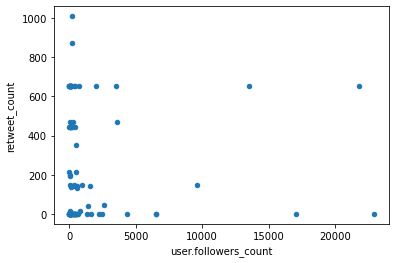

In [249]:
df_tweets.plot.scatter(x='user.followers_count', y='retweet_count')

# Sentimental Analysis
- Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral.

## Cleaning of Tweets 

In [325]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

## Finding Polarity by using TextBlob library

In [333]:
def analyse_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [334]:
df_tweets['Sentiment_findings'] = np.array([ analyse_sentiment(tweet) for tweet in df_tweets['text'] ])

<ipython-input-334-27fc9caaf83a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['Sentiment_findings'] = np.array([ analyse_sentiment(tweet) for tweet in df_tweets['text'] ])


In [335]:
df_tweets.head()

,id,created_at,text,source,retweet_count,user.screen_name,user.location,user.created_at,user.followers_count,Sentiment_findings
0,1460034780561645569,Sun Nov 14 23:59:52 +0000 2021,RT @SajSadiqCricket: T20 World Cup winners:\n\...,[Twitter for iPhone],212,oblmir,The North,Sun May 23 14:34:06 +0000 2021,491,0
1,1460034653193060355,Sun Nov 14 23:59:22 +0000 2021,RT @QasimKhanSuri: Congratulations to #Austral...,[Twitter for Android],46,TeamQasimSuri,Pakistan,Fri Dec 14 22:28:51 +0000 2018,2611,1
2,1460034595890417666,Sun Nov 14 23:59:08 +0000 2021,RT @amitspeakshere: Heart goes out for @BLACKC...,[Twitter for Android],1,ssshree330,,Thu Aug 12 16:51:31 +0000 2021,16,1
3,1460034379221241858,Sun Nov 14 23:58:16 +0000 2021,Glenn Maxwell &amp; Haris Rauf gifted T20 Worl...,[Twitter for Android],0,Zaibi_oo8,"Punjab, Pakistan",Fri Oct 03 13:25:43 +0000 2014,378,1
4,1460034107958706176,Sun Nov 14 23:57:12 +0000 2021,RT @20pratyush: There was a time when I though...,[Twitter for Android],1,ssshree330,,Thu Aug 12 16:51:31 +0000 2021,16,-1


In [347]:
df_tweets['Sentiment_findings'].value_counts()

 1    61
 0    35
-1     4
Name: Sentiment_findings, dtype: int64

## Classification of Tweets based on Polarity

In [373]:
positive = [ tweet for index, tweet in enumerate(df_tweets['text']) if df_tweets['Sentiment_findings'][index] > 0]
neutral = [ tweet for index, tweet in enumerate(df_tweets['text']) if df_tweets['Sentiment_findings'][index] == 0]
negative = [ tweet for index, tweet in enumerate(df_tweets['text']) if df_tweets['Sentiment_findings'][index] < 0]

In [395]:
negative

['RT @20pratyush: There was a time when I thought that though #Kane is a class player, he is not meant for #T20 cricket.\n\nHE PROVED ME WRONG!…',
 'Tamim Iqbal has been ruled out from the series against Pakistan due to a broken thumb #BANvPAK #Cricket',
 'Player of the tournament is only Babar Azam...who deserve,we rejected this fucking decision of ICC… https://t.co/xC1jcLRmpG',
 'RT @TryPlotX: The final show-down is here! It has finally come down to #NewZealand  &amp; #Australia squaring up in the #T20WorldCupFinal \n\nHer…']

# Sentiment Findings Visualization 

## Pie Chart Visualization

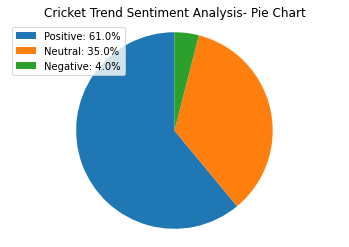

In [392]:
Pos = len(positive)/len(df_tweets.index) * 100
Neu = len(neutral)/len(df_tweets.index) * 100
Neg = len(negative)/len(df_tweets.index) * 100

labels = ['Positive: ' +str(Pos)+'%' , 'Neutral: '+str(Neu)+'%' ,'Negative: '+str(Neg)+'%']
sizes = [Pos, Neu, Neg]
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(labels)
plt.title( 'Cricket Trend Sentiment Analysis- Pie Chart' )
plt.axis('equal')
plt.show()

## Bar Plot Visualization

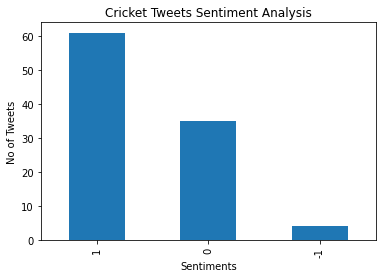

In [346]:
df_tweets['Sentiment_findings'].value_counts().plot(kind='bar')
plt.title("Cricket Tweets Sentiment Analysis")
plt.xlabel("Sentiments")
plt.ylabel("No of Tweets")
plt.show()

# Conclusion
- Mostly tweets were positive or neutral and only 4% were negative. 